In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
TIME_DATA_PATH = "../csv_files/time_data/"
DATA_PATH = "../csv_files/misc/data.csv"

In [3]:
# Extract each .csv file as a df, ignoring if min_valid percentage of F0's are present
# Returns the valid dfs, and a mapping between healthcodes and their indices in the listed dfs
def filter_valid_timedata(folder_path, min_valid = 0.5):
    valid_dfs = []
    healthcode_to_index = {}
    index_to_healthcode = {}

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)

            total = len(df)
            non_null = df['F0'].notna().sum()

            if total > 0 and non_null / total >= min_valid:
                valid_dfs.append(df)
                index = len(valid_dfs) - 1
                
                healthcode = os.path.splitext(file)[0]
                healthcode_to_index[healthcode] = index
                index_to_healthcode[index] = healthcode

    return valid_dfs, healthcode_to_index, index_to_healthcode

In [4]:
valid_positive, positive_code_to_index, positive_index_to_code = filter_valid_timedata(TIME_DATA_PATH + "positive")
valid_negative, negative_code_to_index, negative_index_to_code = filter_valid_timedata(TIME_DATA_PATH + "negative")

In [5]:
print(f"Positive samples: {len(valid_positive)}")
print(f"Negative samples: {len(valid_negative)}")

assert len(valid_positive) == len(positive_code_to_index) == len(positive_index_to_code)
assert len(valid_negative) == len(negative_code_to_index) == len(negative_index_to_code)

Positive samples: 25
Negative samples: 30


In [6]:
# Cleanup the survey data to only include sampled rows
survey_data = pd.read_csv(DATA_PATH)

valid_keys = set(positive_code_to_index.keys()).union(negative_code_to_index.keys())
survey_data = survey_data[survey_data["healthCode"].isin(valid_keys)]

survey_data = survey_data.drop_duplicates(subset="healthCode")

## Visualization

In [31]:
def visualize_formants_over_time(df, title):
    formants = ['F0', 'F1', 'F2', 'F3']
    num_formants = len(formants)

    fig, axes = plt.subplots(num_formants, 1, figsize=(10, 2.5 * num_formants), sharex=True)

    for i, formant in enumerate(formants):
        if formant in df.columns:
            axes[i].plot(df['time'], df[formant], label=formant, color=f"C{i}")
            axes[i].set_ylabel(f"{formant} (Hz)")
            axes[i].set_title(f"{formant} over time")
            axes[i].grid(True)
            axes[i].legend()

    axes[-1].set_xlabel("Time (s)")
    fig.suptitle(f"Formant values for healthcode: {title}", fontsize=14)
    plt.show()

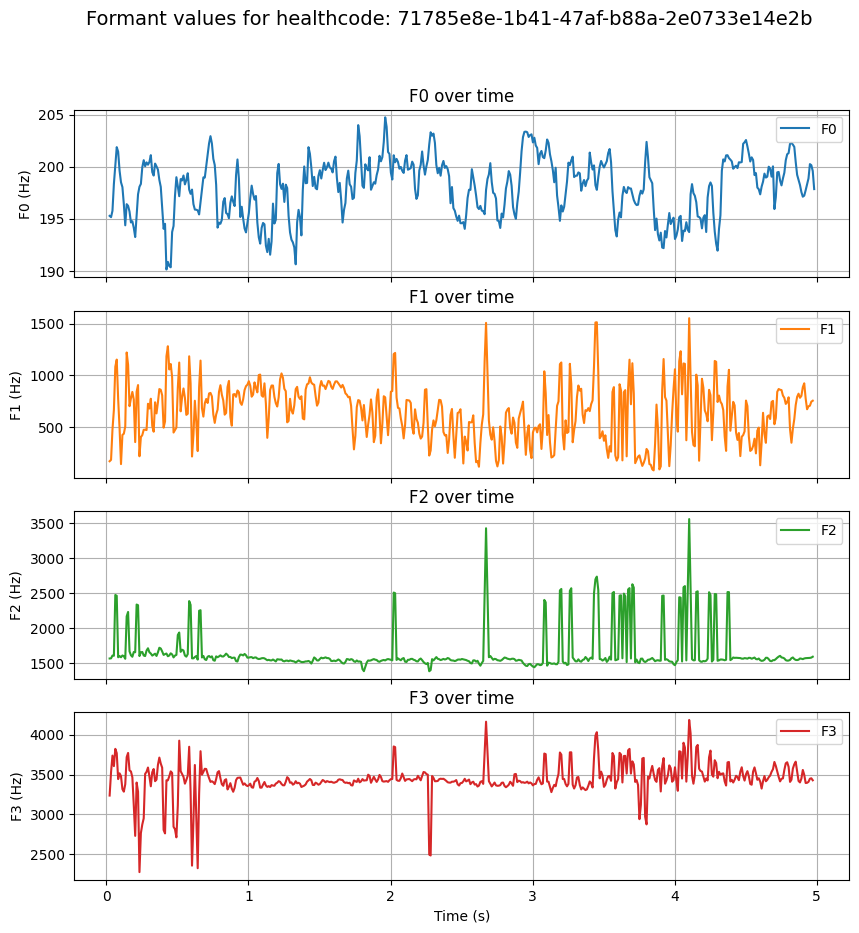

In [32]:
# Sample use of function 
visualize_formants_over_time(valid_positive[0], positive_index_to_code[0])

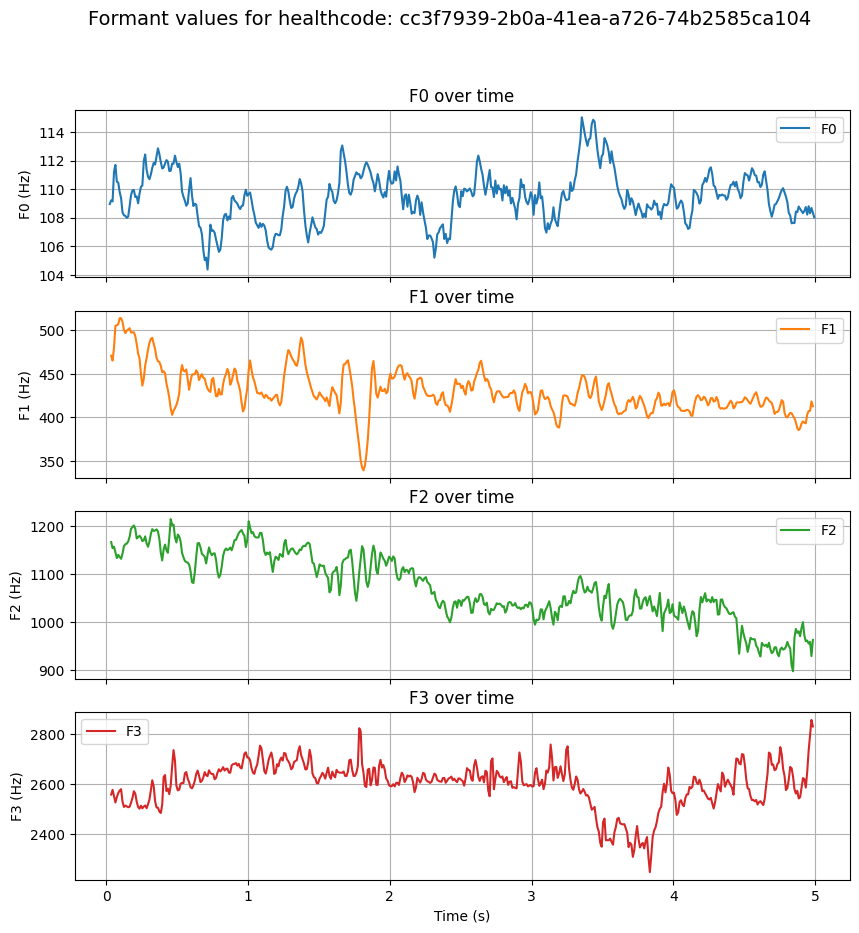

In [33]:
visualize_formants_over_time(valid_negative[1], negative_index_to_code[1])